# 최단경로
- source : [백준 1753](https://www.acmicpc.net/problem/1753)
- 난이도 : 골드 IV
- 분류 : 그래프 이론, 데이크스트라

## 문제
- 방향그래프가 주어지면 주어진 시작점에서 다른 모든 정점으로의 최단 경로를 구하는 프로그램을 작성하시오. 단, 모든 간선의 가중치는 10 이하의 자연수이다.
    
## 입력
- 첫째 줄에 정점의 개수 V와 간선의 개수 E가 주어진다. (1 ≤ V ≤ 20,000, 1 ≤ E ≤ 300,000) 모든 정점에는 1부터 V까지 번호가 매겨져 있다고 가정한다. 둘째 줄에는 시작 정점의 번호 K(1 ≤ K ≤ V)가 주어진다. 셋째 줄부터 E개의 줄에 걸쳐 각 간선을 나타내는 세 개의 정수 (u, v, w)가 순서대로 주어진다. 이는 u에서 v로 가는 가중치 w인 간선이 존재한다는 뜻이다. u와 v는 서로 다르며 w는 10 이하의 자연수이다. 서로 다른 두 정점 사이에 여러 개의 간선이 존재할 수도 있음에 유의한다.

## 출력
- 첫째 줄부터 V개의 줄에 걸쳐, i번째 줄에 i번 정점으로의 최단 경로의 경로값을 출력한다. 시작점 자신은 0으로 출력하고, 경로가 존재하지 않는 경우에는 INF를 출력하면 된다.

- 만약, 어떤 알파벳이 단어에 포함되어 있지 않다면 -1을 출력한다. 단어의 첫 번째 글자는 0번째 위치이고, 두 번째 글자는 1번째 위치이다.

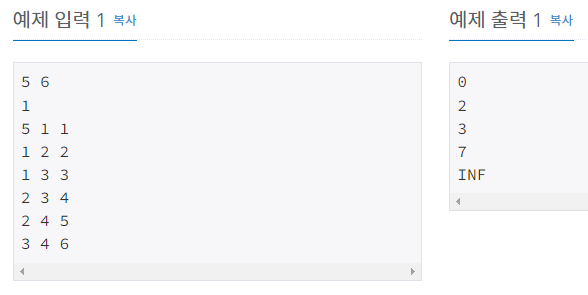

In [6]:
import sys

INF = sys.maxsize
print(INF)
INF2 = int(1e9)
print(INF2)

9223372036854775807
1000000000


In [17]:
v

4

In [16]:
dp = [INF]*(v+1)
dp

[9223372036854775807,
 9223372036854775807,
 9223372036854775807,
 9223372036854775807,
 9223372036854775807]

In [25]:
import heapq
import sys 

V, E = 5, 6
K = 1
graph_tmp = [[5, 1, 1],
[1, 2, 2],
[1, 3, 3],
[2, 3, 4],
[2, 4, 5],
[3, 4, 6]]

INF = sys.maxsize
dp = [INF] * (V+1)
heap = []

graph = [[] for _ in range(V+1)]
for u, v, w in graph_tmp:
    graph[u].append((v, w))
print(graph)

def dijkstra(start):
    dp[start] = 0
    heapq.heappush(heap, (start, 0))
    print(heap)
    while heap:
        now, wei = heapq.heappop(heap)
        
        if dp[now] < wei:
            continue
        
        for next_node, w in graph[now]:  # 현재 노드에서 갈 수 있는 모든 간선을 탐색 
            next_wei = w + wei           # start부터 다음 노드까지의 가중치 합 
            
            if next_wei < dp[next_node]: # 최솟값인지 확인 
                dp[next_node] = next_wei
                print(dp)
                heapq.heappush(heap, (next_node, next_wei))

dijkstra(K)
print(dp)
for i in range(1, V+1):
    print("INF" if dp[i] == INF else dp[i])

[[], [(2, 2), (3, 3)], [(3, 4), (4, 5)], [(4, 6)], [], [(1, 1)]]
[(1, 0)]
[9223372036854775807, 0, 2, 9223372036854775807, 9223372036854775807, 9223372036854775807]
[9223372036854775807, 0, 2, 3, 9223372036854775807, 9223372036854775807]
[9223372036854775807, 0, 2, 3, 7, 9223372036854775807]
[9223372036854775807, 0, 2, 3, 7, 9223372036854775807]
0
2
3
7
INF


**최종코드**

In [5]:
import sys
inp = sys.stdin.readline

import heapq

V, E = map(int, inp().split())
K = int(inp())

graph = [[] for _ in range(V+1)]
for _ in range(E):
    u, v, w = map(int, inp().split())
    graph[u].append((w, v))

INF = sys.maxsize
dp = [INF] * (V+1)
heap = []

def dijkstra(start):
    dp[start] = 0
    heapq.heappush(heap, (0, start))
    while heap:
        wei, now = heapq.heappop(heap)
        
        if dp[now] < wei:
            continue
        
        for w, next_node in graph[now]:
            next_wei = w + wei # start부터 다음 노드까지의 가중치 합 
            
            if next_wei < dp[next_node]:
                dp[next_node] = next_wei
                
                heapq.heappush(heap, (next_wei, next_node))

dijkstra(K)
for i in range(1, V+1):
    print("INF" if dp[i] == INF else dp[i])

baekjoon
1 0 -1 -1 2 -1 -1 -1 -1 4 3 -1 -1 7 5 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1


- 다익스트라 기본 구조를 사용하면 풀리는 문제
- 익숙해지도록 이 구조를 여러번 연습해야겠다. 

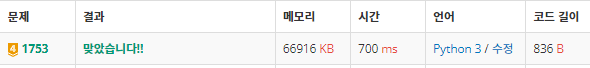

- [코드 출처](https://sungmin-joo.tistory.com/33)